In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# Step 1: Creating Dataset

In [3]:
np.random.seed(42)

In [4]:
countries = ['USA', 'UK', 'Germany', 'France', 'India', 'Japan', 'Canada', 'Australia', 'Brazil', 'South Africa']

In [5]:
data = {
    'CustomerID': np.arange(1, 101),
    'Age': np.random.randint(18, 80, 100),
    'MonthlySubscription': np.random.uniform(10, 500, 100),
    'TotalSpending': np.random.uniform(500, 100000, 100),
    'SubscriptionLength': np.random.randint(1, 120, 100),
    'Country': np.random.choice(countries, 100),
    'PaymentMethod': np.random.choice(['Credit Card', 'Bank Transfer', 'Cryptocurrency', 'PayPal'], 100),
    'CustomerSatisfaction': np.random.randint(1, 11, 100),
    'Churn': np.random.choice(['Yes', 'No'], 100)
}


In [6]:
df = pd.DataFrame(data)

In [7]:
print(df)

    CustomerID  Age  MonthlySubscription  TotalSpending  SubscriptionLength  \
0            1   56           203.623616   53327.991040                  33   
1            2   69           464.062844   45054.424875                  67   
2            3   46           366.363278   55512.862363                  18   
3            4   32           170.004977   59473.324026                  25   
4            5   60           289.517547    8544.905970                 106   
..         ...  ...                  ...            ...                 ...   
95          96   46           211.408137   57443.100682                  55   
96          97   35            26.194859   98042.992580                  40   
97          98   43           179.084912    7996.952473                  52   
98          99   61           320.832159   30916.853419                  16   
99         100   51           343.545671   19495.647599                  13   

         Country   PaymentMethod  CustomerSatisfact

In [9]:
df.head

<bound method NDFrame.head of     CustomerID  Age  MonthlySubscription  TotalSpending  SubscriptionLength  \
0            1   56           203.623616   53327.991040                  33   
1            2   69           464.062844   45054.424875                  67   
2            3   46           366.363278   55512.862363                  18   
3            4   32           170.004977   59473.324026                  25   
4            5   60           289.517547    8544.905970                 106   
..         ...  ...                  ...            ...                 ...   
95          96   46           211.408137   57443.100682                  55   
96          97   35            26.194859   98042.992580                  40   
97          98   43           179.084912    7996.952473                  52   
98          99   61           320.832159   30916.853419                  16   
99         100   51           343.545671   19495.647599                  13   

         Country   Pa

In [10]:
# Step 2: Data Preprocessing

In [12]:
le = LabelEncoder()
for col in ['Country', 'PaymentMethod', 'Churn']:
        df[col] = le.fit_transform(df[col])




In [13]:
# Step 3: Feature Engineering

In [14]:
X = df.drop(columns=['CustomerID', 'Churn'])

In [15]:
y = df['Churn']

In [16]:
# Step 4: Splitting the Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Step 5: Scaling the Data

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
# Step 6: Training the Model

In [23]:
model = RandomForestClassifier(n_estimators=150, random_state=42, max_depth=10)

In [24]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [25]:
# Step 7: Making Predictions

In [26]:
y_pred = model.predict(X_test)

In [27]:
# Step 8: Evaluating the Model

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.65


In [29]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.69      0.75      0.72        12

    accuracy                           0.65        20
   macro avg       0.63      0.62      0.63        20
weighted avg       0.64      0.65      0.65        20



In [30]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[4 4]
 [3 9]]


In [31]:
# Step 9: Data Visualization

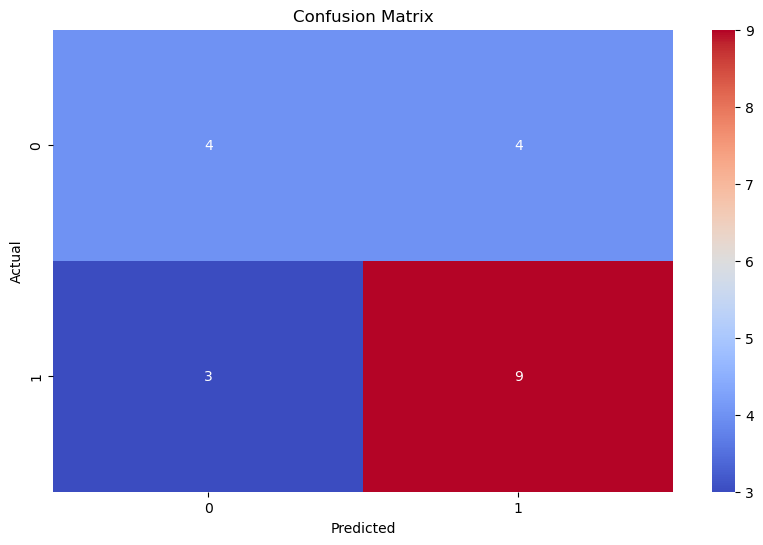

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [33]:
# Step 10: Feature Importance

In [35]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

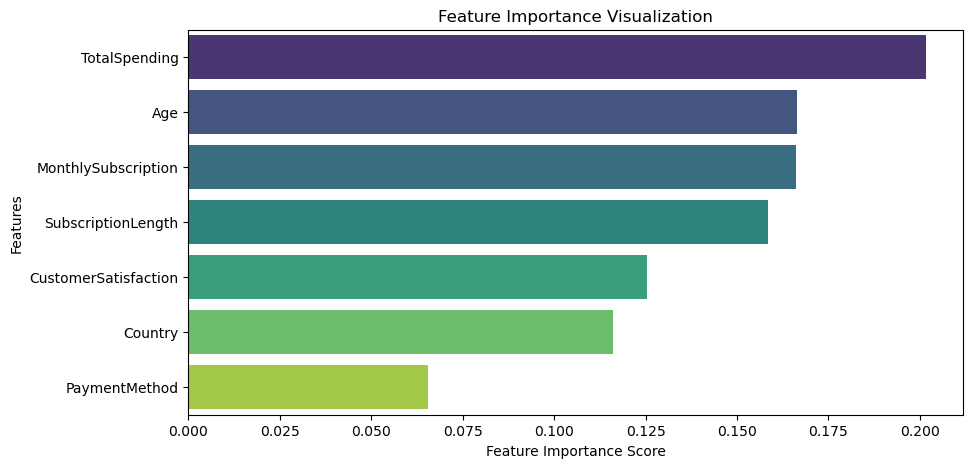

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Visualization')
plt.show()
